<a href="https://colab.research.google.com/github/HamadKhan345/ml-study-repo/blob/main/Feature_Scaling_Standardization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df = df.iloc[:,2:]

In [ ]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [ ]:
df.shape

(400, 3)

In [ ]:
X = df.iloc[:,0:2]

In [ ]:
y = df.iloc[:,-1]

In [ ]:
X.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [ ]:
y.head()

,Purchased
0,0
1,0
2,0
3,0
4,0


<h1>Train Test Split</h1>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((320, 2), (80, 2), (320,), (80,))

<h1>StandardScaler</h1>

In [ ]:
scaler = StandardScaler()

scaler.fit(X_train)
#transformation
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
scaler.mean_

array([3.8218750e+01, 6.9928125e+04])

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

<h1>Effect of Scaling</h1>

In [ ]:
np.round(X_train_scaled.describe(),1), np.round(X_train.describe(),1)

(         Age  EstimatedSalary
 count  320.0            320.0
 mean     0.0              0.0
 std      1.0              1.0
 min     -2.0             -1.6
 25%     -0.8             -0.8
 50%     -0.0             -0.0
 75%      0.8              0.5
 max      2.1              2.3,
          Age  EstimatedSalary
 count  320.0            320.0
 mean    38.2          69928.1
 std     10.3          34570.1
 min     18.0          15000.0
 25%     30.0          43000.0
 50%     38.0          69500.0
 75%     46.0          88000.0
 max     60.0         150000.0)

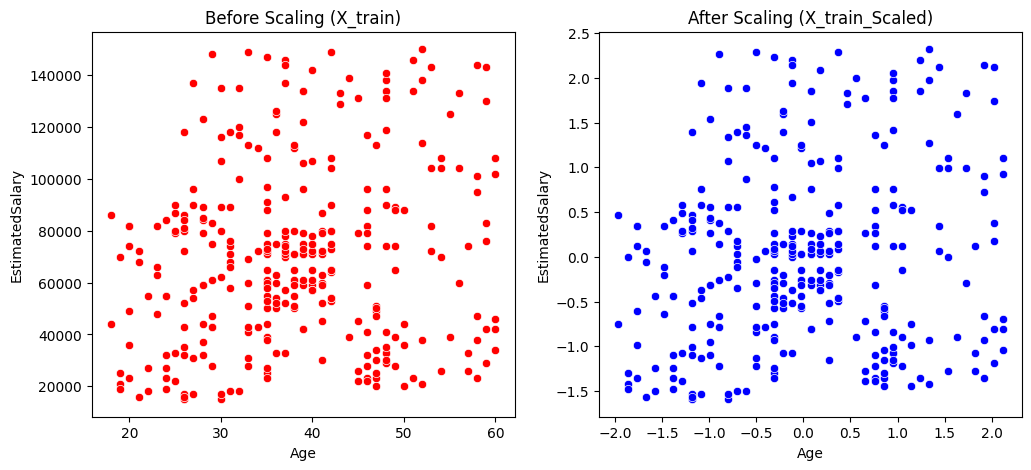

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(x='Age', y='EstimatedSalary', data=X_train, ax=axes[0], color='red')
axes[0].set_title('Before Scaling (X_train)')

sns.scatterplot(x='Age', y='EstimatedSalary', data=X_train_scaled, ax=axes[1], color='blue')
axes[1].set_title('After Scaling (X_train_Scaled)')



plt.show()

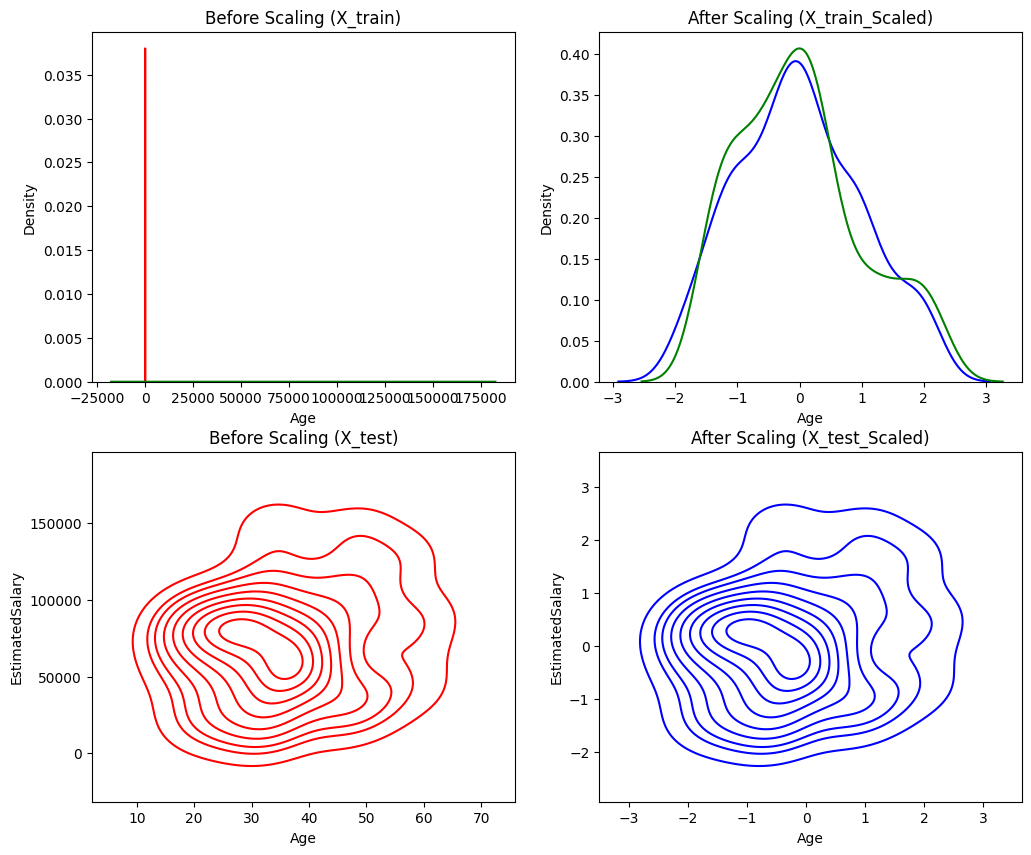

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.kdeplot(x='Age', data=X_train, ax=axes[0,0], color='red')
sns.kdeplot(x='EstimatedSalary', data=X_train, ax=axes[0,0], color='green')
axes[0,0].set_title('Before Scaling (X_train)')

sns.kdeplot(x='Age', data=X_train_scaled, ax=axes[0,1], color='blue')
sns.kdeplot(x='EstimatedSalary', data=X_train_scaled, ax=axes[0,1], color='green')
axes[0,1].set_title('After Scaling (X_train_Scaled)')

sns.kdeplot(x='Age', y='EstimatedSalary', data=X_test, ax=axes[1,0], color='red')
axes[1,0].set_title('Before Scaling (X_test)')

sns.kdeplot(x='Age', y='EstimatedSalary', data=X_test_scaled, ax=axes[1,1], color='blue')
axes[1,1].set_title('After Scaling (X_test_Scaled)')

plt.show()

<h1>Importance of Scaling</h1>

In [ ]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [ ]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [ ]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [ ]:
print("Actual Data: ", accuracy_score(y_test, y_pred))
print("Scaled Data: ", accuracy_score(y_test, y_pred_scaled))

Actual Data:  0.9125
Scaled Data:  0.925
